In [51]:
import pandas as pd
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import csv

#reference: https://github.com/JosephMagiya/Weighted-Location-Clustering/blob/master/Weighted%20Location%20Clustering.ipynb

## ARC Tour Data Cleaning

In [3]:
import pandas as pd

tour_df = pd.read_csv('indivTourData_1.csv')

,Lon,Lat,Number of Records,Dest Taz,End Period,Orig Taz,Start Period,Tour Category,Tour Id,Tour Mode,Tour Purpose
0,-84.431222,33.663345,1,1123,13:00,1137,13:00,AT_WORK,11,1,atwork_business
1,-84.350280,33.908791,1,1426,11:00,289,8:30,AT_WORK,11,1,atwork_business
2,-84.363082,33.939034,1,249,11:30,211,10:00,AT_WORK,11,1,atwork_business
3,-84.308173,33.816777,1,1535,10:00,1562,9:00,AT_WORK,11,1,atwork_business
4,-84.468353,33.880322,1,2363,13:30,2355,9:00,AT_WORK,11,1,atwork_business
5,-84.476211,33.869125,1,2328,12:00,2353,11:30,AT_WORK,11,1,atwork_business
6,-84.398026,33.768237,1,515,12:30,735,12:00,AT_WORK,11,1,atwork_business
7,-84.433868,33.734944,1,456,11:00,995,10:30,AT_WORK,11,1,atwork_business
8,-84.551403,33.984141,1,1971,12:30,2207,10:30,AT_WORK,11,1,atwork_business
9,-84.362757,33.791569,1,526,14:30,538,13:30,AT_WORK,11,1,atwork_business


In [7]:
#drop empty values
tour_df.dropna(subset=['Lon','Lat'])

#filter the work population
tour_df = tour_df[(tour_df['Tour Purpose'] == 'work_bluecollar') | (tour_df['Tour Purpose'] == 'work_whitecollar') | (tour_df['Tour Purpose'] == 'work_health') | (tour_df['Tour Purpose'] == 'work_retailandfood') | (tour_df['Tour Purpose'] == 'work_services')]

print("After dropping rows that contains NaN on 'Lon','Lat' column: ", poi_location_df.shape)
tour_df.head(10)

After dropping rows that contains NaN on 'Lon','Lat' column:  (1048575, 11)


,Lon,Lat,Number of Records,Dest Taz,End Period,Orig Taz,Start Period,Tour Category,Tour Mode,Tour Purpose
466,-84.415933,34.07898,1,2188,18:00,1,6:30,MANDATORY,3,work_whitecollar
471,-84.415933,34.07898,1,2275,20:00,1,9:00,MANDATORY,3,work_whitecollar
473,-84.415933,34.07898,1,2486,18:00,1,6:00,MANDATORY,2,work_services
480,-84.415933,34.07898,1,2400,19:30,1,8:00,MANDATORY,1,work_retailandfood
481,-84.415933,34.07898,1,2201,18:00,1,6:00,MANDATORY,3,work_bluecollar
483,-84.415933,34.07898,1,358,17:30,1,7:00,MANDATORY,12,work_retailandfood
484,-84.415933,34.07898,1,2338,22:30,1,20:30,MANDATORY,3,work_whitecollar
487,-84.415933,34.07898,1,2776,17:00,1,6:00,MANDATORY,1,work_services
489,-84.415933,34.07898,1,77,19:30,1,6:30,MANDATORY,1,work_whitecollar
491,-84.415933,34.07898,1,2264,17:00,1,9:30,MANDATORY,1,work_whitecollar


In [48]:
#divide data into meaningful time blocks
tour_morning = tour_df[(tour_df['Start Period'] == '8:00') | (tour_df['Start Period'] == '8:30') | (tour_df['Start Period'] == '9:00') | (tour_df['Start Period'] == '9:30') | (tour_df['Start Period'] == '10:00')] 
tour_afternoon = tour_df[(tour_df['Start Period'] == '16:00') | (tour_df['Start Period'] == '16:30') | (tour_df['Start Period'] == '17:00') | (tour_df['Start Period'] == '17:30') | (tour_df['Start Period'] == '18:00')] 

In [10]:
print ("Morning Tours")
print ("Dataset shape (row, column): ", tour_morning.shape)
print ("Minimum Longitude: ", tour_morning['Lon'].min())
print ("Maximum Longitude: ", tour_morning['Lon'].max())
print ("Minimum Latitude: ", tour_morning['Lat'].min())
print ("Maximum Latitude: ", tour_morning['Lat'].max())
print ("Minimum Origin Taz: ", tour_morning['Orig Taz'].min())
print ("Maximum Origin Taz: ", tour_morning['Orig Taz'].max())


Morning Tours
Dataset shape (row, column):  (81127, 10)
Minimum Longitude:  -84.81621257
Maximum Longitude:  -83.97191887
Minimum Latitude:  33.51056498
Maximum Latitude:  34.17668513
Minimum Origin Taz:  1
Maximum Origin Taz:  2770


## Morning Tour Tunning Set

C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


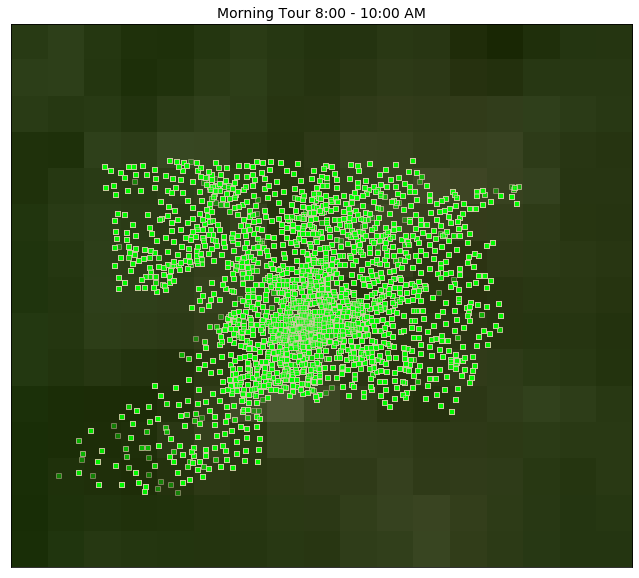

In [13]:
#visualize work population in the morning
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-84.9
ulon=-83.8
llat=33.4
ulat=34.2

# selecting the boundaries of the map from lattitude and longitude 

tour_morning = tour_morning[(tour_morning['Lon'] > llon) & (tour_morning['Lon'] < ulon) & 
                        (tour_morning['Lat'] > llat) &(tour_morning['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(tour_morning.Lon), np.asarray(tour_morning.Lat))
tour_morning['xm']= xs.tolist()
tour_morning['ym'] =ys.tolist()

#Visualization1
for index,row in tour_morning.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 5, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Morning Tour 8:00 - 10:00 AM", fontsize=14)
# plt.savefig("morning_clusters.png", dpi=300)
plt.show()

In [49]:
#assign weights to geo points based on the number of occurance in the dataset
tour_morning_weight = tour_morning.groupby(['Lon','Lat']).size().to_frame('Weight').reset_index()
tour_morning_weight

,Lon,Lat,Weight
0,-84.816213,33.536920,1
1,-84.781564,33.540993,4
2,-84.780472,33.587602,2
3,-84.775730,33.560204,1
4,-84.773451,33.568774,2
...,...,...,...
2250,-83.987032,33.959410,1
2251,-83.986824,33.964818,2
2252,-83.986242,33.923693,94
2253,-83.985747,33.951980,7


## Create an elbow curve to select the optimal number of clusters

In [54]:
#define the range of clusters we want to generate
K_clusters = range(1,100)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

lat_long = tour_morning_weight[tour_morning_weight.columns[0:2]]
lot_size = tour_morning_weight[tour_morning_weight.columns[2]]

sample_weight = lot_size

score = [kmeans[i].fit(lat_long, sample_weight = lot_size).score(lat_long) for i in range(len(kmeans))]

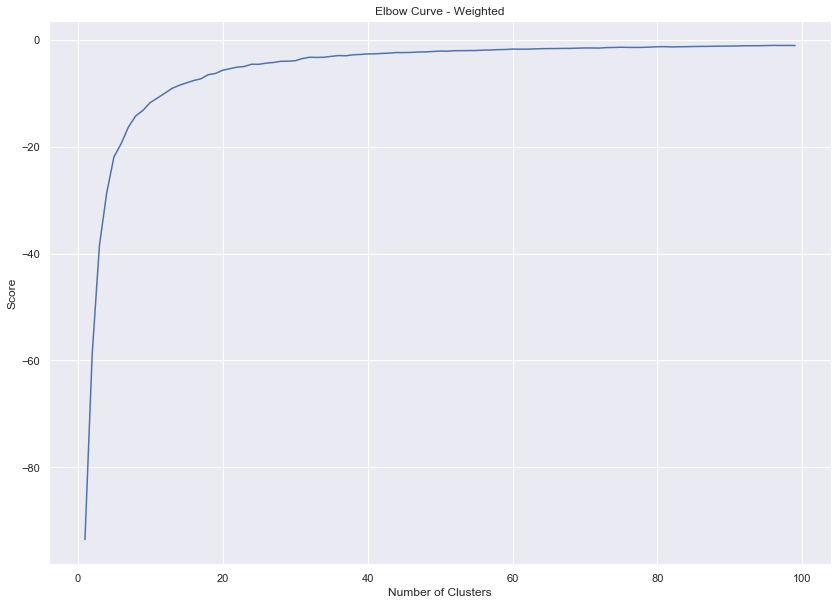

In [55]:
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve - Weighted')

plt.show()

## Weighted culstering using 30 clusters

Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Weighted')

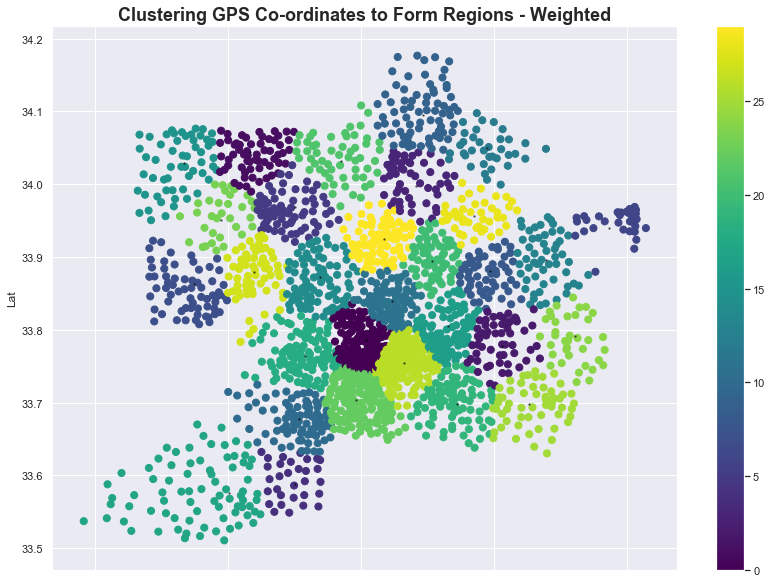

In [64]:
kmeans = KMeans(n_clusters = 30, max_iter=100000, init ='k-means++')

lat_long = tour_morning_weight[tour_morning_weight.columns[0:2]]
lot_size = tour_morning_weight[tour_morning_weight.columns[2]]
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
tour_morning_weight['cluster_label'] = kmeans.predict(lat_long, sample_weight = lot_size)

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = tour_morning_weight['cluster_label'] # Labels of each point

tour_morning_weight.plot.scatter(x = 'Lon', y = 'Lat', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=2, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=18, fontweight='bold')

## Visualize Results

In [66]:
tour_morning_weight.head(2)

,Lon,Lat,Weight,cluster_label
0,-84.816213,33.536920,1,17
1,-84.781564,33.540993,4,17


In [67]:
centers = kmeans.cluster_centers_
print(centers)

[[-84.39243432  33.78555358]
 [-84.56583698  34.04492326]
 [-84.1887222   33.77800428]
 [-84.31748002  33.99744677]
 [-84.49864047  33.58795519]
 [-84.49936182  33.96930331]
 [-84.0270318   33.93952005]
 [-84.65127477  33.86342701]
 [-84.20581907  33.88072722]
 [-84.3067425   34.0950282 ]
 [-84.49343844  33.67748769]
 [-84.35337915  33.83996637]
 [-84.20997323  34.04934917]
 [-84.12165986  33.89605694]
 [-84.46068861  33.87288228]
 [-84.66533533  34.02854091]
 [-84.26900646  33.80493377]
 [-84.59802239  33.57532781]
 [-84.48329007  33.7642774 ]
 [-84.25580611  33.69791265]
 [-84.29249194  33.89436389]
 [-84.42989133  34.0319966 ]
 [-84.40709909  33.70376211]
 [-84.61021641  33.95125445]
 [-84.07809582  33.79082151]
 [-84.1475097   33.69832358]
 [-84.33485163  33.7540005 ]
 [-84.56074271  33.87867265]
 [-84.22972621  33.95674209]
 [-84.36471269  33.92452672]]


In [72]:
desiredHubLat = [33.78555358, 34.04492326, 33.77800428, 33.99744677, 33.58795519,
                 33.96930331, 33.93952005, 33.86342701, 33.88072722, 34.0950282, 
                 33.67748769, 33.83996637, 34.04934917, 33.89605694, 33.87288228,
                 34.02854091, 33.80493377, 33.57532781, 33.7642774, 33.69791265,
                 33.89436389, 34.0319966, 33.70376211, 33.95125445, 33.79082151,
                 33.69832358, 33.7540005, 33.87867265, 33.95674209, 33.92452672]
desiredHubLons = [-84.39243432, -84.56583698, -84.1887222, -84.31748002, -84.49864047, 
                  -84.49936182, -84.0270318, -84.65127477, -84.20581907, -84.3067425,
                  -84.49343844, -84.35337915, -84.20997323, -84.12165986, -84.46068861, 
                  -84.66533533, -84.26900646, -84.59802239, -84.48329007, -84.25580611, 
                  -84.29249194, -84.42989133, -84.40709909, -84.61021641, -84.07809582, 
                  -84.1475097, -84.33485163, -84.56074271, -84.22972621, -84.36471269]

# with open('arc_hub_location.txt', 'w') as f:
#     fixed_data=[(float(desiredHubLons[i]),float(desiredHubLat[i])) for i in range(len(desiredHubLat))]
#     for line in fixed_data:
#         f.write(str(line)+','+'\n')
        
arc_hub_data = pd.DataFrame(
    {'Lat': desiredHubLat,
     'Lon': desiredHubLons,
    })
arc_hub_list = arc_hub_data.values.tolist()
arc_hub_list[7]

[33.86342701, -84.65127477]

In [73]:
import folium
import shapefile

map = folium.Map(location=[33.749, -84.388], zoom_start=12)
for point in range(0, len(arc_hub_list)):
    folium.Marker(arc_hub_list[point], popup=arc_hub_list[point]).add_to(map)

map.save("arc_potential_hub_location.html")
map